# Основы визуализации данных с помощью Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных

### Описание домашнего задания и формат сдачи

Вам предстоит выполнить задачи по визуализации данных. Для этого  впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

**Важно учесть:** У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-9, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии

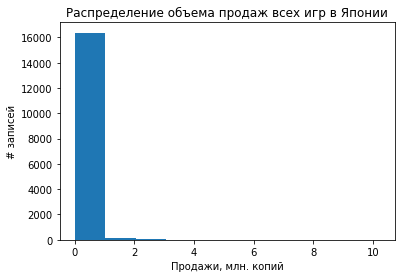

In [32]:
plt.hist(df['JP_Sales'].sort_values(ascending=True))
plt.title('Распределение объема продаж всех игр в Японии')
plt.xlabel('Продажи, млн. копий')
plt.ylabel('# записей');
#На мой взгляд такой график не показателен, т.к. большинство игр из датасета в Японии не продавалось

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах

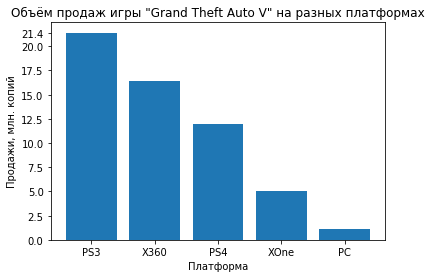

In [9]:
series = df[df['Name']=='Grand Theft Auto V']
plt.bar(series['Platform'], series['Global_Sales'])
plt.title('Объём продаж игры "Grand Theft Auto V" на разных платформах')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. копий')
y_range = list(np.arange(0, series['Global_Sales'].max(),2.5))
y_range.append(series['Global_Sales'].max())
plt.yticks(y_range);


### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам

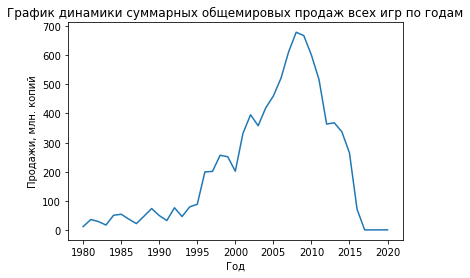

In [36]:
series = df.groupby('Year')['Global_Sales'].sum()
plt.plot(series)
plt.title('График динамики суммарных общемировых продаж всех игр по годам')
plt.xlabel('Год')
plt.ylabel('Продажи, млн. копий');

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке

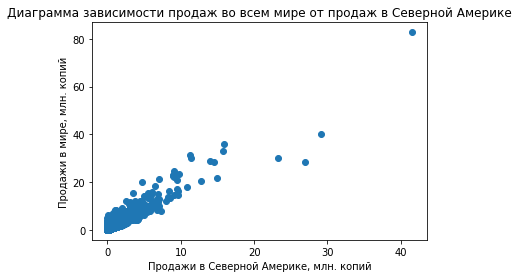

In [38]:
plt.scatter(df['NA_Sales'], df['Global_Sales'])
plt.title('Диаграмма зависимости продаж во всем мире от продаж в Северной Америке')
plt.xlabel('Продажи в Северной Америке, млн. копий')
plt.ylabel('Продажи в мире, млн. копий');

### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

D:\bin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


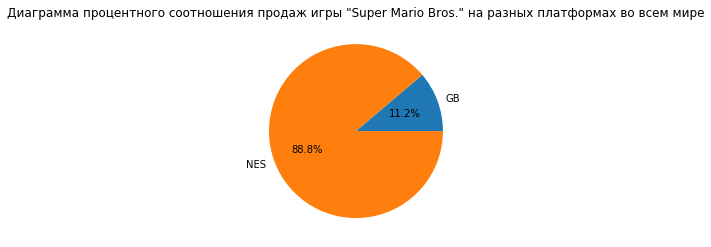

In [3]:
series = df[df['Name']=="Super Mario Bros."][['Platform', 'Global_Sales']].groupby('Platform').sum()
plt.title('Диаграмма процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире')
plt.pie(series, labels=series.index, autopct='%1.1f%%');

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всем мире в 2013 году и проиллюстрируйте величину их продаж на столбчатой гистограмме

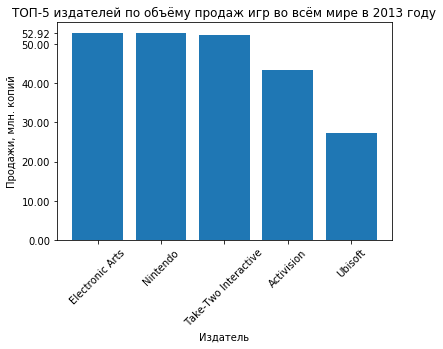

In [28]:
series = df[df['Year']==2013].groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).head(5)
plt.bar(series.index, series['Global_Sales'])
plt.title('ТОП-5 издателей по объёму продаж игр во всём мире в 2013 году')
plt.xlabel('Издатель')
plt.ylabel('Продажи, млн. копий')
y_range = list(np.arange(0, series['Global_Sales'].max()+1,10))
y_range.append(series['Global_Sales'].max())
plt.yticks(y_range)
plt.xticks(rotation=45);

### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

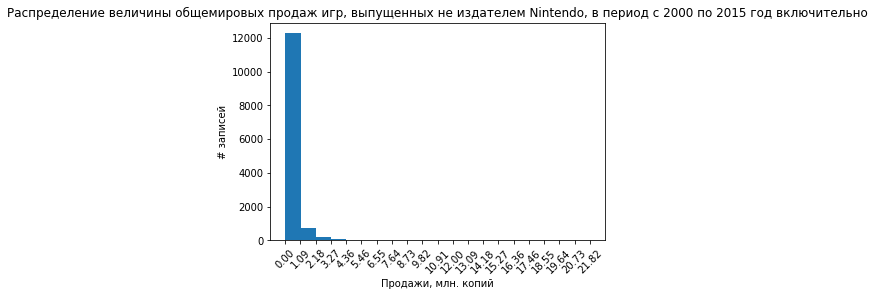

In [37]:
serie = df[(df['Year']>=2000) & (df['Year']<=2015) & (df['Publisher']!='Nintendo')]['Global_Sales']
plt.hist(serie, bins=20)
bin_width = serie.max() / 20
x_range = [i*bin_width for i in range(21)]
plt.title('Распределение величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно')
plt.xlabel('Продажи, млн. копий')
plt.ylabel('# записей')
plt.xticks(x_range, rotation=45);

### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам

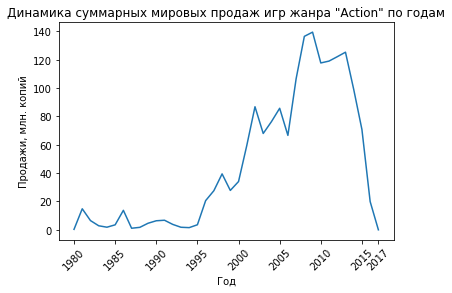

In [61]:
serie = df[(df['Genre']=='Action')].groupby('Year')['Global_Sales'].sum()
plt.plot(serie)
plt.title('Динамика суммарных мировых продаж игр жанра "Action" по годам')
plt.xlabel('Год')
plt.ylabel('Продажи, млн. копий')
x_range = list(np.arange(serie.index.min(), serie.index.max()+1, 5))
x_range.append(serie.index.max())
plt.xticks(x_range, rotation=45);

### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

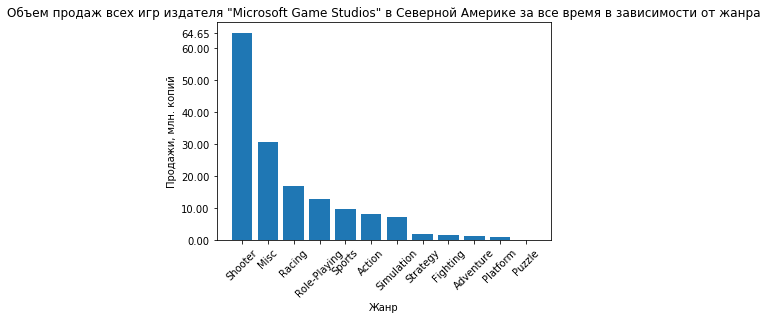

In [67]:
serie = df[(df['Publisher']=='Microsoft Game Studios')].groupby('Genre').sum().sort_values('NA_Sales', ascending=False)
plt.bar(serie.index, serie['NA_Sales'])
plt.title('Объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн. копий')
y_range = list(np.arange(0, serie['NA_Sales'].max()+1,10))
y_range.append(serie['NA_Sales'].max())
plt.yticks(y_range)
plt.xticks(rotation=45);